<a href="https://colab.research.google.com/github/huliyao1115/Hello-world/blob/main/Optimisation%20Parameters%20without%205-fold%20CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 8.6 MB/s eta 0:00:00


In [2]:
!pip install scikit-learn

In [31]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

In [32]:
df = pd.read_csv('Wrong_SMILES_Delete.csv')

In [33]:
df.drop(['SMILE_Organic_linker_1','Molar_Volume_cm3_mol','Resistivity_Ω_cm','Mohs_Hardness','Specific_Heat_Capacity_J_(g·K)-1','Ionization_Potential_eV','Electrical_Conductivity_MS_m','Thermal_Conductivity_W_m·K','Rayon_Atomique_pm','Electron_Affinity_eV','Boiling_Point_℃','Melting_Point_℃','Atomic_Number','METAL','Atomic_Number','1s', '2s', '2p', '3s', '3p', '3d', '4s', '4p', '4d', '4f', '5s', '5p'], axis=1, errors='ignore', inplace=True)

In [34]:
# Split the data into training and test sets
X = df.drop(['CO2 Uptake'], axis=1).values
y = df['CO2 Uptake'].values


In [35]:
# # Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# # Convert to panda dataframe with specified column names
column_names = ['Surface_Area', 'Pore_Volume', 'Pressure', 'Temperature', 'Molar_Mass_g_mol', 'Electronegativity_Pauling', 'Density_g_cm3']
X_scaled = pd.DataFrame(X_scaled, columns=column_names)

In [38]:
X_scaled, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)


In [39]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.pipeline import Pipeline

In [43]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

In [44]:
param_grid = {
    'poly__degree': [2, 3, 4],          # degree of polynomial
    'linear__fit_intercept': [True, False]
}

In [10]:
# # Initialize the model
# lm = LinearRegression()

In [11]:
# # Define the parameter grid
# param_grid = {'fit_intercept':[True,False]}

In [46]:
from sklearn.metrics import mean_squared_error, make_scorer

In [47]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [12]:
# Initialize the grid search object
grid = GridSearchCV(lm, param_grid)

In [48]:
# Fit the grid search object to the data
grid_search = grid.fit(X_scaled, y)
grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'linear__fit_intercept': [True, False],
                         'poly__degree': [2, 3, 4]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [49]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters found:  {'linear__fit_intercept': True, 'poly__degree': 2}
Best score:  -0.011159319532683351


In [52]:
# print(best_normalize)
# print(best_degree)
# use best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [16]:
# poly = PolynomialFeatures(degree=2, include_bias=False)

# PolynomialFeatures(degree=2, include_bias=False)

# poly.fit_transform(X_scaled)

array([[1.84309864e-01, 8.24324324e-02, 9.10746812e-04, ...,
        9.75461058e-01, 9.87654321e-01, 1.00000000e+00],
       [1.84309864e-01, 8.24324324e-02, 1.63934426e-02, ...,
        9.75461058e-01, 9.87654321e-01, 1.00000000e+00],
       [1.84309864e-01, 8.24324324e-02, 1.63934426e-02, ...,
        9.75461058e-01, 9.87654321e-01, 1.00000000e+00],
       ...,
       [4.43623831e-01, 1.21621622e-01, 9.10746812e-04, ...,
        9.75461058e-01, 9.87654321e-01, 1.00000000e+00],
       [9.14163795e-02, 2.43243243e-02, 1.63934426e-02, ...,
        4.61057766e-01, 5.10677809e-01, 5.65638069e-01],
       [9.14163795e-02, 2.43243243e-02, 9.10746812e-04, ...,
        4.61057766e-01, 5.10677809e-01, 5.65638069e-01]])

In [17]:
# y_pred = grid.predict(X_scaled)

In [54]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error on test set: {mse}')
print(f'Mean Absolute Error on test set: {mae}')
print(f'R² Score on test set: {r2}')

Mean Squared Error on test set: 0.01635377197635291
Mean Absolute Error on test set: 0.10453110695736345
R² Score on test set: 0.9999982546520781


In [28]:
print(len(y_test), len(y_pred))


34 166


ValueError: x and y must be the same size

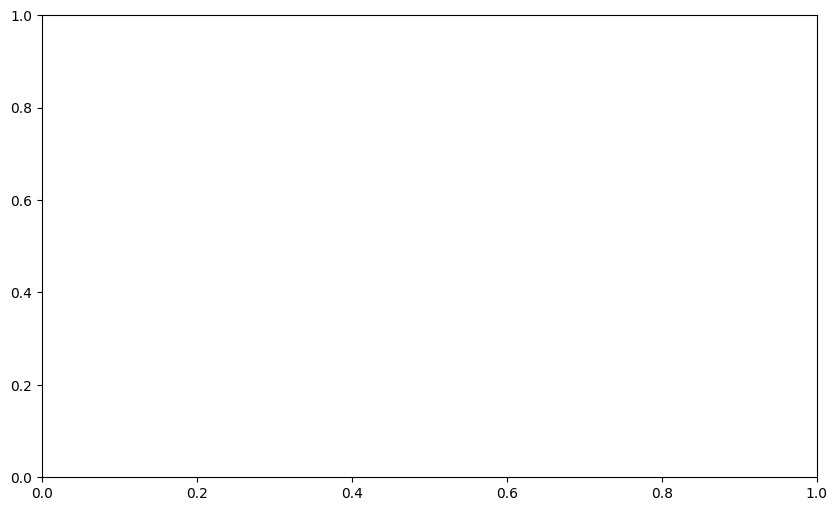

In [20]:
# Visualize the results
# scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()



In [29]:
# Residual plots
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


ValueError: operands could not be broadcast together with shapes (34,) (166,) 

<Figure size 1000x600 with 0 Axes>